In [1]:
%matplotlib widget
import warnings
import inspect
import IPython.display
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from my_LP import quantise
from my_DWT import *
from cued_sf2_lab.jpeg import dwtgroup
from huffman import *
import importlib
from common import *

In [2]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lighthouse = lighthouse -  128.0
bridge = bridge - 128.0
flamingo = flamingo - 128.0

In [3]:
X = lighthouse

In [4]:
from skimage.metrics import structural_similarity as ssim
X = np.zeros(dtype = int, shape=(256, 256))
print(ssim(X, X + 2, data_range = 256))

0.62098241358399


In [5]:
pca_object, pca_result, factors, strength = DWT_quant(X)
print('Factors are: {factors}')

i: 0
energy at i=0: 0.9988200898004702
energy at i=0: 0.9988200898004702
energy at i=0: 1.0
i: 1
energy at i=1: 0.997591649903163
energy at i=1: 0.997591649903163
energy at i=1: 1.0
i: 2
energy at i=2: 0.993434360467275
energy at i=2: 0.993434360467275
energy at i=2: 1.0
i: 3
energy at i=3: 0.9780633316039605
energy at i=3: 0.9780633316039604
energy at i=3: 1.0
i: 4
energy at i=4: 0.9185419306835455
energy at i=4: 0.9185419306835455
energy at i=4: 1.0
i: 5
energy at i=5: 0.6684202780430513
energy at i=5: 0.6684202780430513
energy at i=5: 1.0
i: 6
energy at i=6: 0.08716268102134132
energy at i=6: 0.08716268102134132
energy at i=6: 1.0
Energy matrix is
[[9.98820090e-01 9.97591650e-01 9.93434360e-01 9.78063332e-01
  9.18541931e-01 6.68420278e-01 8.71626810e-02 4.00596449e-02]
 [9.98820090e-01 9.97591650e-01 9.93434360e-01 9.78063332e-01
  9.18541931e-01 6.68420278e-01 8.71626810e-02 1.00000000e+10]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+

c:\Users\stefa\OneDrive - University of Cambridge\2A INZINJERSTVO KEMBRIDZ\EASTER2023 PROJECTS\SF2 Image Processing\sf2-competition\sf2-competition-2023-team-10\my_DWT.py:98: RuntimeWarning: invalid value encountered in divide
  factors = factors[0, N]/factors


NameError: name 'PCA_DWT' is not defined

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 38525
Bits for huffman table = 1424
38.525
Generating huffcode and ehuf using custom tables
Decoding rows
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.shape
Shape of yq is: yq.sh

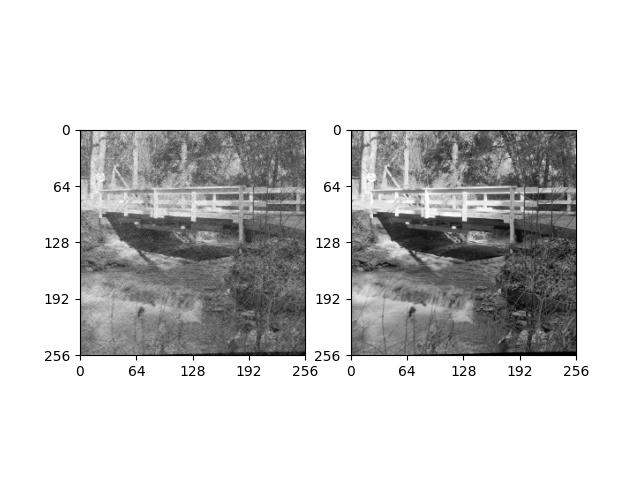

In [5]:
# reconstructed0 = inverse_DWT(Yq, N, g1, g2)
vlc, header = PCA_huffenc(pca_result, opthuff=True)
print(np.sum(vlc[:, 1])/1000)
pca_decoded = PCA_huffdec(vlc, pca_object, hufftab=header)

DWT_decoded = inverse_PCA_DWT(pca_object, pca_result)



DWT_final = quantdwt2(DWT_decoded, factors, strength=strength)
reconstructed = inverse_DWT(DWT_final, N, g1, g2)


fig, axs = plt.subplots(1, 2)
plot_image(reconstructed, ax=axs[0])
plot_image(X, ax=axs[1])

# size_of_img = np.sum(vlc[:, 1])
# axs.set(title='Decoded and reconstructed image', yticks=[], xlabel=f'no. of bits: {size_of_img:.2e}')


print("Error:", np.std(reconstructed-X).round(2))

In [ ]:
vlc, header = DWT_huffenc(flamingo, N=7, dcbits=8, opthuff=True)
Z = DWT_huffdec(vlc, 10, factors, strength, N=7, hufftab=header)

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 528880
Bits for huffman table = 1424
Generating huffcode and ehuf using custom tables
Decoding rows


In [ ]:
from cued_sf2_lab.jpeg import (
    jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen, runampl, diagscan)


Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 68264
Bits for huffman table = 1424
68264
Generating huffcode and ehuf using custom tables
Decoding rows
12.670574791143471


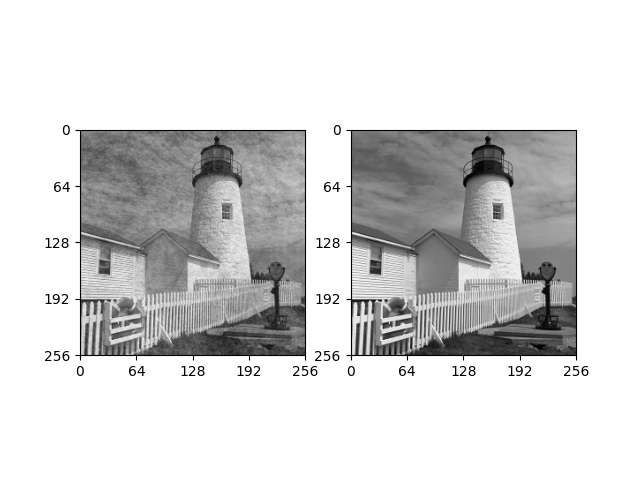

In [ ]:
from PCA_DWT import *

Y = DWT(lighthouse, N)
Yq = quant1(Y, 10, 0.5)
# ratios = get_ratios(Y, N, g1, g2)
# factors = get_factors(Y, N)
# Yq, _ = quantdwt(Y, 10*np.ones((3, N+1))*ratios, factors, 0)
pca, result = PCA_DWT(Yq)
result_clipped = np.clip(result, -1023, 1023)
encoded, header = PCA_huffenc(result_clipped, opthuff=True)

print(np.sum(encoded[:, 1]))

decoded = PCA_huffdec(encoded, header)
recon = inverse_PCA_DWT(pca, decoded)

recon = quant2(Yq, 10, 0.5)
Z = inverse_DWT(recon, N, g1, g2)

fig, axs = plt.subplots(1, 2)
plot_image(Z, ax=axs[0])
plot_image(lighthouse, ax=axs[1])

print(np.std(Z-lighthouse))

In [ ]:
bpp(lighthouse)*256*256

493398.1567807872